In [3]:
import numpy as np
a = np.array([
    [3, 7],
    [-4, -6],
    [7,8],
    [1 , -1],
    [-4, -1],
    [-3, -7]
])

In [8]:
a

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [9]:
a.shape

(6, 2)

In [10]:
import pandas as pd

In [11]:
pd.DataFrame(a, columns=['a0',  'a1'])

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [12]:
a0 = a[:,0]
a1 = a[:,1]

In [13]:
a0

array([ 3, -4,  7,  1, -4, -3])

In [14]:
a1

array([ 7, -6,  8, -1, -1, -7])

In [15]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [17]:
np.sum(a0*a1)/5

25.0

In [18]:
a.T

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [20]:
sigma = a.T @ A/5

In [23]:
l , x = np.linalg.eig(sigma)

In [24]:
l

array([ 3.07417596, 56.92582404])

In [25]:
x

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [26]:
sigma 

array([[20., 25.],
       [25., 40.]])

In [30]:
# print second principle component
sigma@x[:,0]

array([-2.54562438,  1.72347161])

In [31]:
# Print first principle component
sigma@x[:,1]

array([-31.91425695, -47.13840945])

In [33]:
pc1_arr = a @ x[:,1]

In [34]:
pc2_arr = a@x[:,0]

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter07/glassdata.csv')

In [38]:
df.drop(columns = ['ID','Type'], axis = 1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [40]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)

In [41]:
df1 = pd.DataFrame(df_scaled)

In [44]:
sigma = np.cov(df_scaled)

In [48]:
df_scaled.shape

(214, 11)

In [46]:
# eigen values and eg=igen vectores
l, x = np.linalg.eig(df_scaled.T @df_scaled/213)

In [47]:
df_scaled.shape

(214, 11)

In [54]:
# Bigger one is the pc1 - l0 = select first vector
# multiply whole dataset by eigen vectors
# dimensiton is 214*9)*(9*1)
# rotation means multiplication with eigen vectors
l

array([3.68386022e+00, 2.36576668e+00, 1.41639247e+00, 1.18127362e+00,
       9.19100060e-01, 6.09947340e-01, 8.43416417e-02, 5.32141366e-02,
       1.57767942e-03, 3.64115108e-01, 3.72054233e-01])

In [55]:
x

array([[ 4.38824473e-01, -1.29996803e-01,  1.52963123e-02,
         9.09447723e-02,  3.12107487e-02,  3.84355211e-01,
        -4.19874901e-01,  2.96414533e-01, -1.39409133e-02,
         5.72448277e-01,  2.03170024e-01],
       [-1.45563043e-01, -5.94720501e-01,  8.93648161e-02,
        -1.51695775e-01, -7.45674537e-02, -7.03775477e-02,
         4.76370527e-01,  5.82995233e-01,  2.26431414e-02,
         5.71483971e-02,  1.14091943e-01],
       [ 2.85277234e-01,  4.05238471e-02, -3.56636312e-01,
        -5.32318013e-01,  1.58495648e-01,  3.65376890e-01,
        -1.74780402e-02,  1.71789796e-01, -3.14143150e-01,
        -4.67146126e-01, -3.27568489e-02],
       [-4.01764656e-01,  2.80313654e-01, -1.91558930e-02,
        -2.86307560e-01,  1.33560514e-01,  1.66113517e-02,
         1.81072627e-01, -4.54189160e-02, -5.75521458e-01,
         5.41738482e-01, -6.29168990e-04],
       [ 3.80388849e-01,  1.60331732e-01,  3.53452217e-01,
         7.39577697e-02,  6.49234361e-03, -1.74769824e-01,
  

In [56]:
pc1_data = df_scaled @ x[:,0]

In [57]:
pc1_data.shape

(214,)

In [59]:
# select 2 nd highest
pc2_data = df_scaled @ x[:,1]

In [61]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=2)

In [65]:
pc1_data

array([-2.14540054e+00, -1.28910765e+00, -1.16362112e+00, -1.61837189e+00,
       -1.54487020e+00, -1.66334292e+00, -1.59328915e+00, -1.70476414e+00,
       -1.33032873e+00, -1.66737565e+00, -1.59664725e+00, -1.68327445e+00,
       -1.63834353e+00, -1.79289994e+00, -1.64869036e+00, -1.61818180e+00,
       -1.78201259e+00, -1.85472477e+00, -1.53363975e+00, -1.29175026e+00,
       -1.66338328e+00, -1.93522966e+00, -1.60101588e+00, -1.50193438e+00,
       -1.42905333e+00, -1.53122680e+00, -1.32253808e+00, -1.42215730e+00,
       -1.47408958e+00, -1.42449552e+00, -1.71911830e+00, -1.54933238e+00,
       -1.70610007e+00, -1.49948942e+00, -1.49622908e+00, -1.26342385e+00,
       -1.17308846e+00, -1.43286704e+00, -2.05660878e+00, -2.04950528e+00,
       -1.57006718e+00, -1.46898088e+00, -1.23272171e+00, -2.00789176e+00,
       -1.85640494e+00, -1.28127421e+00, -1.57120741e+00, -2.22584509e+00,
       -2.07794867e+00, -1.25726298e+00, -2.35193515e+00, -1.45943819e+00,
       -1.07223647e+00, -

In [64]:
pca.fit_transform(df1)

array([[-2.14540054e+00,  2.64014297e-01],
       [-1.28910765e+00, -1.20019734e+00],
       [-1.16362112e+00, -1.57932728e+00],
       [-1.61837189e+00, -9.79452339e-01],
       [-1.54487020e+00, -1.20849016e+00],
       [-1.66334292e+00, -1.28053110e+00],
       [-1.59328915e+00, -1.14100295e+00],
       [-1.70476414e+00, -1.09477227e+00],
       [-1.33032873e+00, -5.02878296e-01],
       [-1.66737565e+00, -9.01521637e-01],
       [-1.59664725e+00, -1.37079926e+00],
       [-1.68327445e+00, -9.36492879e-01],
       [-1.63834353e+00, -1.33347870e+00],
       [-1.79289994e+00, -8.60631362e-01],
       [-1.64869036e+00, -1.02978786e+00],
       [-1.61818180e+00, -1.03610463e+00],
       [-1.78201259e+00, -8.23224215e-01],
       [-1.85472477e+00,  9.14083942e-01],
       [-1.53363975e+00, -1.48936960e-02],
       [-1.29175026e+00, -9.47625582e-01],
       [-1.66338328e+00, -6.73603526e-01],
       [-1.93522966e+00,  4.30654894e-01],
       [-1.60101588e+00, -8.27838475e-01],
       [-1.

In [66]:
pca = PCA()

In [67]:
principal_component = pca.fit_transform(df1)

In [68]:
pca.explained_variance_ratio_

array([3.33331447e-01, 2.14064700e-01, 1.28161256e-01, 1.06886695e-01,
       8.31641091e-02, 5.51906472e-02, 3.36650601e-02, 3.29466941e-02,
       7.63159290e-03, 4.81504295e-03, 1.42755190e-04])

Text(0, 0.5, 'eVR')

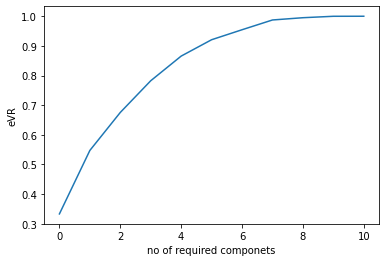

In [70]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no of required componets")
plt.ylabel('eVR')

In [71]:
pca.explained_variance_ratio_

array([3.33331447e-01, 2.14064700e-01, 1.28161256e-01, 1.06886695e-01,
       8.31641091e-02, 5.51906472e-02, 3.36650601e-02, 3.29466941e-02,
       7.63159290e-03, 4.81504295e-03, 1.42755190e-04])

# PART2

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter07/glassdata.csv')

In [75]:
# Performing decomposition operation
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [76]:
df.isna().sum()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [85]:
df = df.drop(columns = ['ID','Type'], axis = 1)

In [86]:
# for decomposition mean = 0 and std =1

In [87]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [88]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)

In [92]:
df1 = pd.DataFrame(scaled_data, columns=df.columns)

In [96]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [94]:
# find covariance
# find eigen vector and eigen values
# matrics mul with existing datasets
# pc1 = highest  eigen value * matrics multi with exis dataset
# pc2 = 2nd highest eigen value * 
# we can generate n no of pca = n no of colm
# but I want data which retails 90% of property of original dataset
# this we can assure from explained variance ratio
# from that I can draw screen plot


In [95]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df1)
# row * no of colums = dimension
# no of compo = no of pca = 9 col = 9 pcas

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [97]:
pd.DataFrame(pca.fit_transform(df1))

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [98]:
# we have create 9 PCA
# how to reduce this PCA
# i dont know from how many pcas I will generate - go with EVR

In [99]:
# how many pcaS i WILL keep here

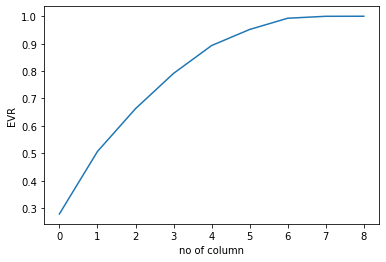

In [102]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of column')
plt.ylabel('EVR')
plt.show()

In [103]:
# if u keep 5 - 95% data
# if i keep 3 = 80
# if i keep 6  = 90


In [104]:
# I will select pca = 5

In [106]:
pca1 = PCA(n_components=5)

In [108]:
new_data = pca1.fit_transform(df1)

In [111]:
x = pd.DataFrame(new_data, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

In [113]:
data1 = df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter07/glassdata.csv')
y = data1.Type

In [114]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [116]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x,y)

DecisionTreeClassifier()

In [122]:
# Passing original dataset
# It is automatically converting 9 colm into 5 colm
pca1.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]])

array([[-14.79669374,  -6.33840708, -37.61313627, -40.78614602,
          1.49953006]])

In [124]:
dt_model.predict(pca1.transform(scalar.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]])))

array([1], dtype=int64)

# K- MEAN